### Carregando o dataframe:

In [1]:
import utils
pd, np, plt, go, seasonal_decompose, MinMaxScaler, mean_squared_error, train_test_split, warnings, stats, adfuller = utils.import_libraries()
df = utils.preparing_df()
%matplotlib inline 

### Analisando o dataframe:

In [2]:
df.shape

(4957, 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4957 entries, 2004-01-02 to 2024-01-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       4957 non-null   float64
dtypes: float64(1)
memory usage: 77.5 KB


In [4]:
df.describe()

,y
count,4957.000000
mean,66.905230
std,28.072064
min,17.604000
25%,49.107000
50%,60.653000
75%,85.973000
max,134.194000


In [5]:
df.isnull().sum()

y    0
dtype: int64

#### Visualizando os valores de fechamento

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['y'], mode='lines', name='lines'))

# Calcular a linha de tendência
x = np.array(range(len(df)))
y = df['y'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Adicionar a linha de tendência ao gráfico
fig.add_trace(go.Scatter(x=df.index, y=line, mode='lines', name='Linha de Tendência'))

fig.update_layout(showlegend=True)
fig.show()


### Análise de série temporal (Decomposição)

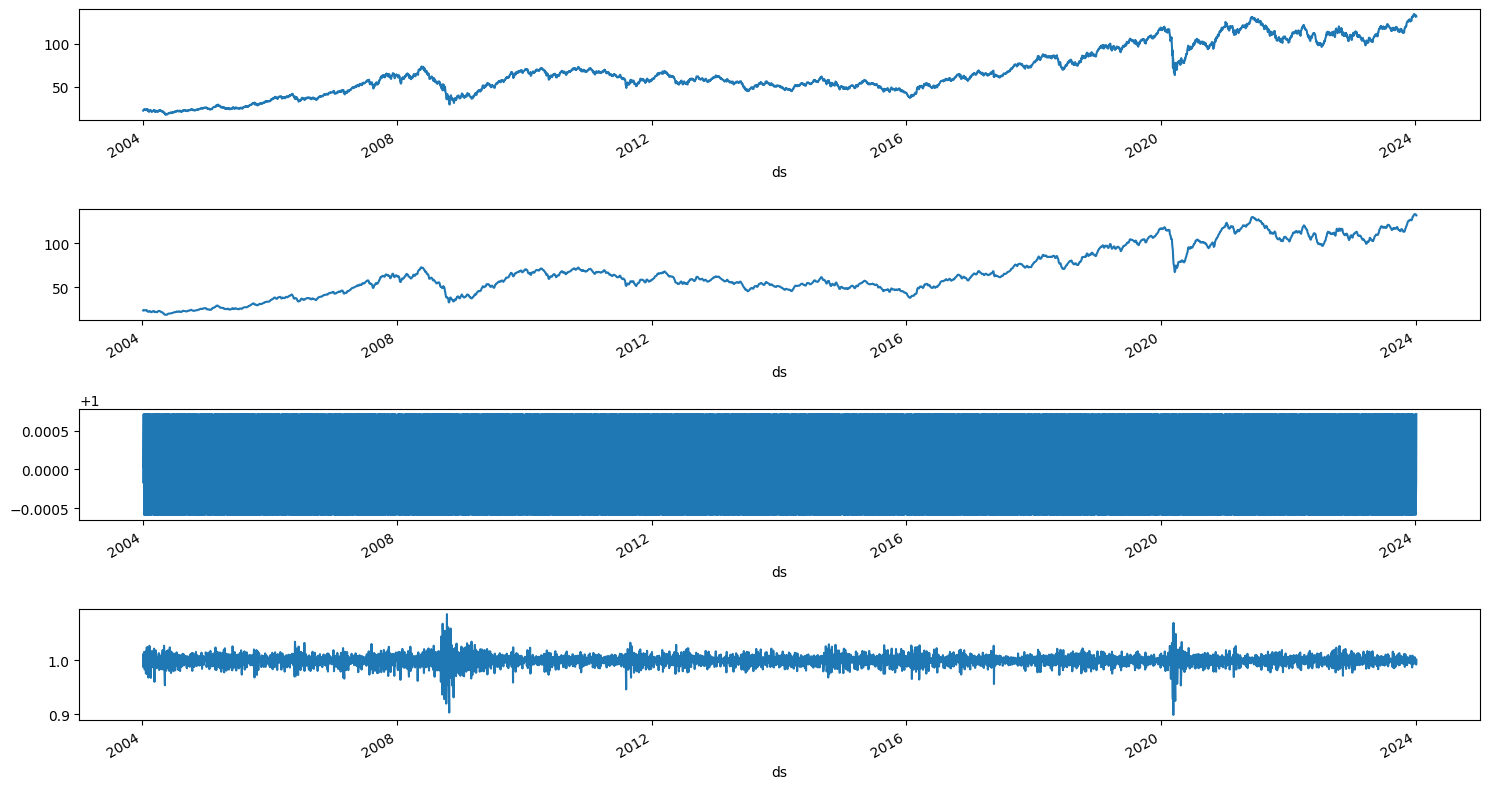

In [7]:
seasonplot = seasonal_decompose(df, model='multiplicative', period=5) # A bolsa de valores abre 5 dias por semana
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,8))
seasonplot.observed.plot(ax=ax1)
seasonplot.trend.plot(ax=ax2)
seasonplot.seasonal.plot(ax=ax3)
seasonplot.resid.plot(ax=ax4)
plt.tight_layout()

## Informações importantes sobre o IBOV e análise dos pontos principais:

### Carteira Teórica
A "carteira teórica" é um termo utilizado para descrever a composição de ativos que formam um índice de mercado. No caso do Ibovespa, a carteira teórica é um conjunto de ações selecionadas que representam os ativos mais negociados e que demonstram maior liquidez na Bolsa de Valores do Brasil. Essa seleção é revisada periodicamente para refletir as mudanças no mercado. O Ibovespa utiliza a carteira teórica para simular o desempenho do mercado de ações como um todo.

### Queda de 2008
A queda de 2008 está relacionada à crise financeira global desencadeada pela bolha imobiliária dos EUA, conhecida como a "crise do subprime". Os efeitos dessa crise foram sentidos em mercados financeiros ao redor do mundo, incluindo a Bovespa, que viu uma redução significativa no valor dos ativos, em linha com a aversão global ao risco e a fuga de capitais.

### Recuperação de 2009
Em 2009, houve uma recuperação no mercado de ações, incluindo o Ibovespa, em grande parte devido às medidas de estímulo econômico adotadas por governos e bancos centrais em várias partes do mundo. No Brasil, a economia começou a mostrar sinais de melhora, e os investidores recuperaram a confiança, levando a uma recuperação do valor do índice.

### Queda de 2015
A queda de 2015 pode ser atribuída a uma combinação de fatores, incluindo a desaceleração econômica do Brasil, a crise política interna e a redução dos preços das commodities. Estes eventos tiveram um impacto negativo sobre o mercado de ações brasileiro, resultando em uma performance menos favorável do Ibovespa.

### Recuperação de 2016
A recuperação do Ibovespa em 2016 foi parcialmente impulsionada pela melhoria do clima político após o impeachment da presidente Dilma Rousseff e a perspectiva de reformas econômicas propostas pelo novo governo. Além disso, a recuperação dos preços das commodities e a melhora do cenário econômico global ajudaram a impulsionar o mercado de ações.

### Queda de 2020
A queda de 2020 foi desencadeada pela pandemia de COVID-19, que causou um choque sem precedentes nas economias globais e nacionais. O Ibovespa, assim como outros índices ao redor do mundo, sofreu quedas acentuadas devido às incertezas econômicas e ao impacto das medidas de confinamento na atividade econômica.

### Recuperação de 2020
Surpreendentemente, ainda em 2020, o Ibovespa e outros mercados começaram a se recuperar rapidamente após as quedas iniciais. As respostas políticas, incluindo estímulos fiscais e monetários significativos e o progresso no desenvolvimento de vacinas, ajudaram a restaurar a confiança dos investidores e a promover uma recuperação nos preços das ações.